In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from collections import Counter
from skimage.filters import threshold_multiotsu
from scipy.ndimage import gaussian_filter

In [59]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from '/Users/zhangzhuang/python/Jupyter/CV/week1/cv-assignments/Final-lab/final_code/utils.py'>

In [42]:
def threshold_segment(image_slice, label, index):
    """
    :param image_slice: one of T1 weighted MRI slices
    :param label: Segmented ‘labelled’ regions of the T1 weighted MRI slice
    :return: segmented T1 weighted MRI slice
    """
    
    # Use Gaussian filter to smooth the image, the strength of filtering is depended on sigma.
    image_slice = gaussian_filter(image_slice, sigma=0.8)
    # Use 'multi-otsu' to calculate 5 thresholds to divide the image into 6 areas
    thresholds = threshold_multiotsu(image_slice, classes=6)
    # Segmentation of image data into different regions based on a set of thresholds
    regions = np.digitize(image_slice, bins=thresholds)
    # Initialize the final segmented image to an all-zero matrix
    final_segmented = np.zeros_like(image_slice)
    # Convert to NumPy array
    image_data = np.array(label)
    regions_data = np.array(regions)
    # Convert to one-dimensional array
    regions_pixel_values = regions_data.flatten().astype(int)
    pixel_values = image_data.flatten().astype(int)
    
    # Count the area of different areas, compare the label images and manually mark them according to the area size.
    counts_segment = Counter(regions_pixel_values)
    sort_counts_segment = sorted(counts_segment.items(), key=lambda x: x[1])
    # print(sort_counts_segment)

    counts = Counter(pixel_values)
    sorted_count = sorted(counts.items(), key=lambda x: x[1])
    # print(sorted_count)
    
    results = [(index, element[0]) for index, element in enumerate(sorted_count)]
    # print(results)
    
    # manually label the color
    for i, value in results:
        # print(i)
        # print(value)
        final_segmented[regions == sort_counts_segment[i][0]] = value
    if index == 0:
        final_segmented[regions == sort_counts_segment[3][0]] = 4
        final_segmented[regions == sort_counts_segment[4][0]] = 5
        
    
    return final_segmented


In [43]:
# loading data
data = loadmat('Brain.mat')
T1 = data['T1']
labels = data['label']
print(T1.shape)
print(labels.shape)

(362, 434, 10)
(362, 434, 10)


In [44]:
final_segmentations = []
f1_scores = []
for i in range(T1.shape[2]):
    print(i)
    image_slice = T1[:, :, i]
    label = labels[:, :, i]
    final_segmented = threshold_segment(image_slice, label, i)
    f1_scores.append(utils.calculate_f1_score(final_segmented, label))
    final_segmentations.append(final_segmented)


0
1
2
3
4
5
6
7
8
9


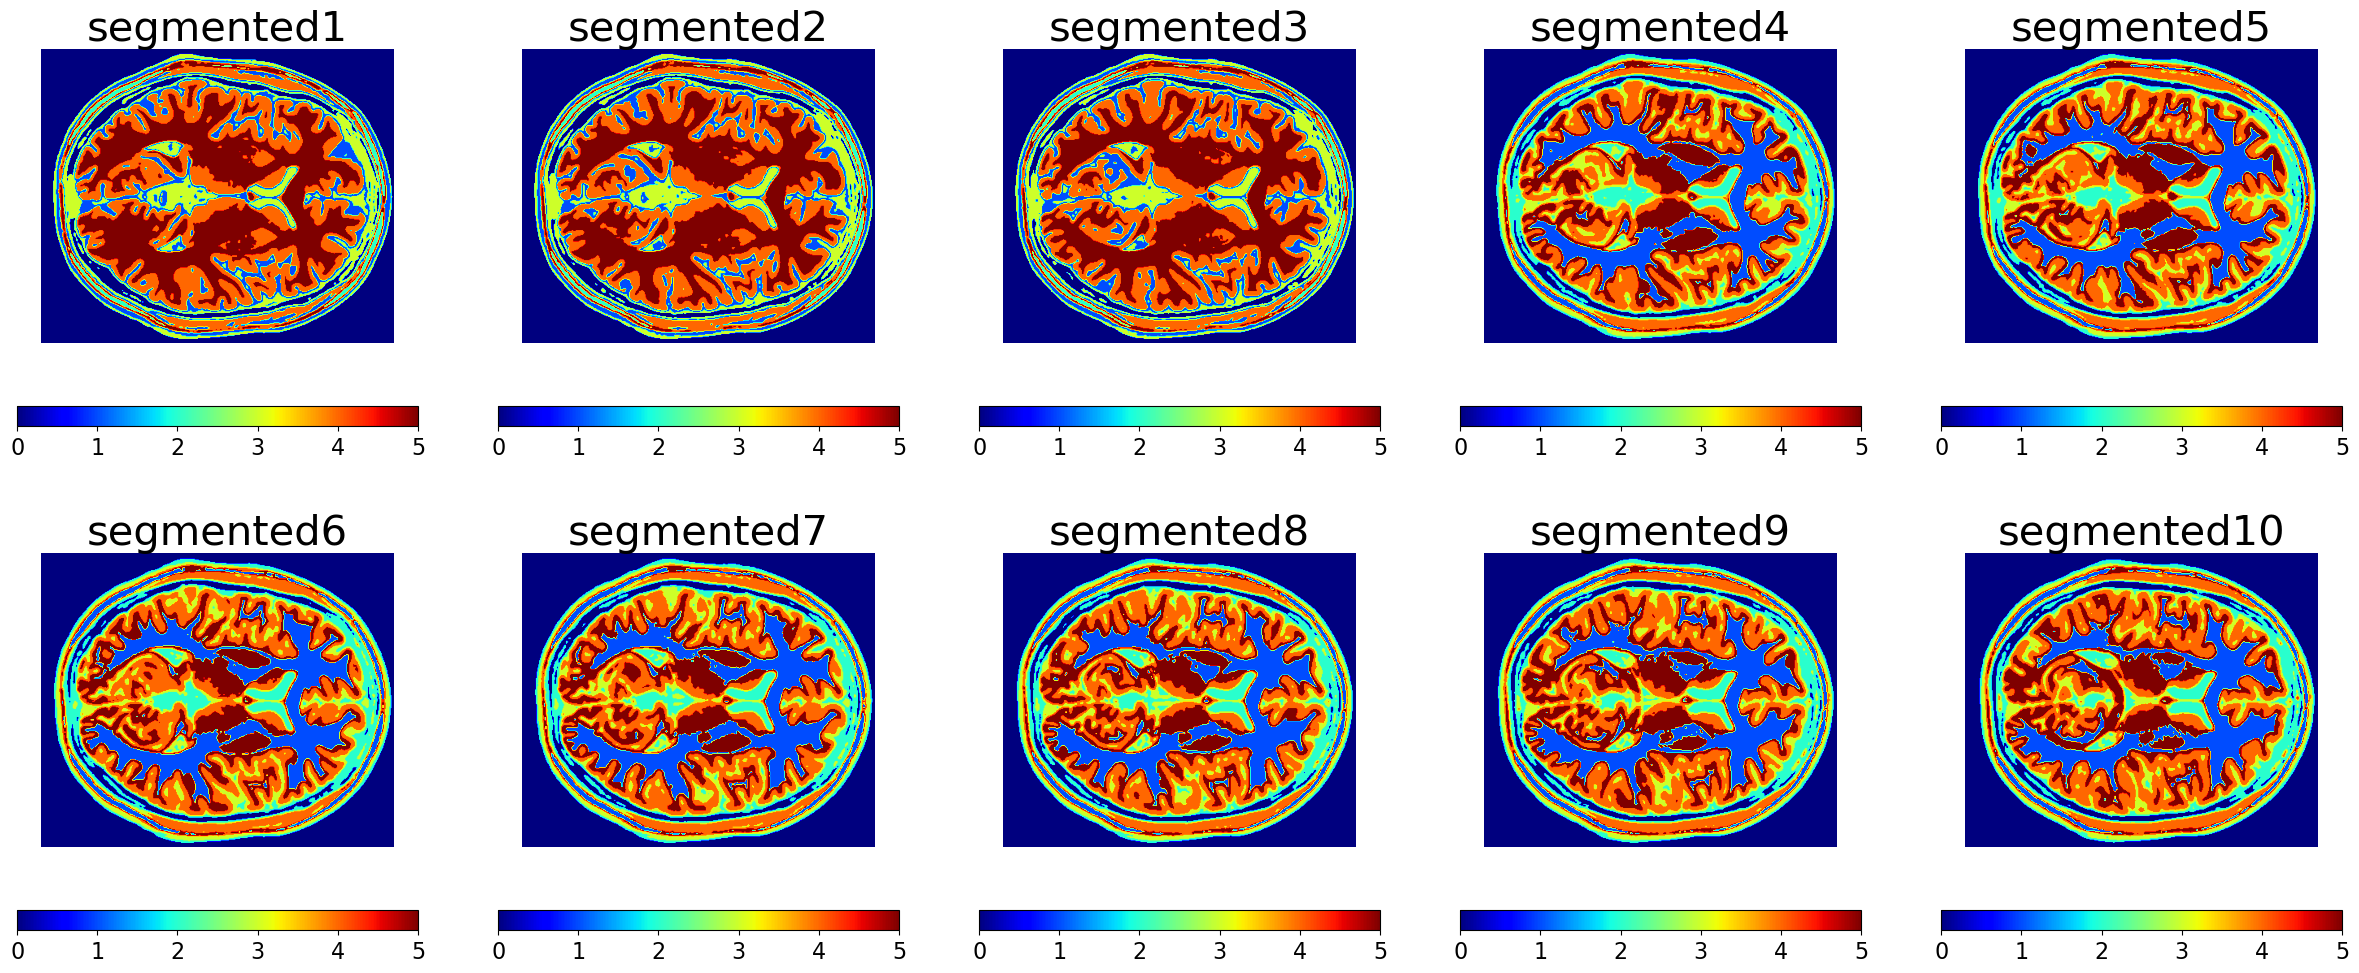

0.7757
0.7741
0.7665
0.5876
0.6026
0.6002
0.6010
0.6085
0.6171
0.6219


In [60]:
plot_rows = 2
plot_cols = 5
fig_size = (6*plot_cols, 6*plot_rows)
image_list = []
image_list.extend([("segmented" + str(i+1), seg) for i, seg in enumerate(final_segmentations)])
font_size = 30
camp = 'jet'
fig, sub_figs = utils.create_subplots(plot_rows, plot_cols, fig_size, image_list, font_size, camp)
plt.show()

for score in f1_scores:
    print(f"{score:.4f}")

In [38]:
image_slice = T1[:,:,3]
label = labels[:, :, 3]
 # Use Gaussian filter to smooth the image, the strength of filtering is depended on sigma.
image_slice = gaussian_filter(image_slice, sigma=0.8)
# Use 'multi-otsu' to calculate 5 thresholds to divide the image into 6 areas
thresholds = threshold_multiotsu(image_slice, classes=6)
# Segmentation of image data into different regions based on a set of thresholds
regions = np.digitize(image_slice, bins=thresholds)
# Initialize the final segmented image to an all-zero matrix
final_segmented = np.zeros_like(image_slice)

0
2
1
3
2
1
3
5
4
4
5
0


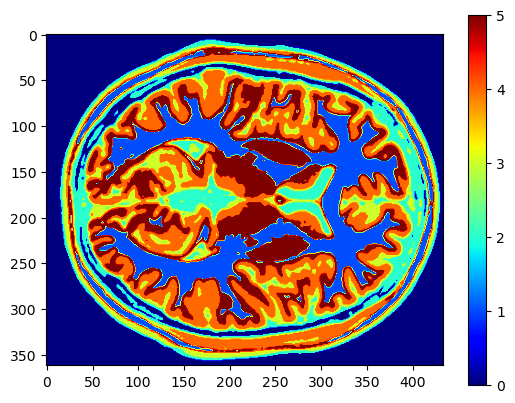

In [41]:
image_data = np.array(label)
regions_data = np.array(regions)
# Convert to one-dimensional array
regions_pixel_values = regions_data.flatten().astype(int)
pixel_values = image_data.flatten().astype(int)

# Count the area of different areas, compare the label images and manually mark them according to the area size.
counts_segment = Counter(regions_pixel_values)
sort_counts_segment = sorted(counts_segment.items(), key=lambda x: x[1])
# print(sort_counts_segment)

counts = Counter(pixel_values)
sorted_count = sorted(counts.items(), key=lambda x: x[1])
# print(sorted_count)

results = [(index, element[0]) for index, element in enumerate(sorted_count)]
# print(results)

# manually label the color
for i, value in results:
    print(i)
    print(value)
    final_segmented[regions == sort_counts_segment[i][0]] = value
        
plt.imshow(final_segmented, cmap='jet')
# 添加颜色条
plt.colorbar()

plt.show()